# Part I: Research Question

## A.  Describe the purpose of this data mining report by doing the following:

### A1  Propose one question relevant to a real-world organizational situation that you will answer using one of the following classification methods:
*The submission proposes 1 question that is relevant to a real-world organizational situation, and the proposal includes 1 of the given classification methods.* \

**Using KNN this notebook strives to classify whether a customer will churn from the company or not.**

### A2  Define one goal of the data analysis. Ensure that your goal is reasonable within the scope of the scenario and is represented in the available data.
*The submission defines 1 reasonable goal for data analysis that is within the scope of the scenario and is represented in the available data.* \
**This notebook will attempt to answer the proposed question of if a customer is likely to churn from the company or not by building a KNN model.** 
 
# Part II: Method Justification

## B.  Explain the reasons for your chosen classification method from part A1 by doing the following:

### B1  Explain how the classification method you chose analyzes the selected data set. Include expected outcomes.
*The submission logically explains how the chosen classification method analyzes the selected data set and includes accurate expected outcomes.* \
**The KNN classification method analyzes the churn data set by looking for it's nearest neighbors within a range set by n_neighbors (k) in the KNearestNeighbor method of the scikitlearn library. It then returns it's results of will churn or will not churn based on the test data points fed into the trained model. The output from the KNN classification method was expected to output whether a customer churned or not.** 

### B2  Summarize one assumption of the chosen classification method.
*The submission adequately summarizes 1 assumption of the chosen classification method.* \
Resource: https://medium.com/swlh/its-all-about-assumptions-pros-cons-497783cfed2d \
#### KNN Assumptions, Pros, and Cons
The items listed here will be used to make decisions about how to clean the data for the method. \
**Assumptions:**
1. Since the data is in the feature space it can be measured by Manhattan, Euclidean, and other similar distance metrics. 
2. Individual training data points consist of a set of vectors (one dimensional array) and a class label associated with each vector. This means we should not use the drop_first argument of the pandas get_dummys built in method when creating our dummy variables.
3. Prefers to have 'K' as an odd number to help prevent a prediction where two classes are a match.
**Pros:** 
1. Very simple and easy to understand.
2. Is a non-parametric algorithm so it does not have strict assumptions.
3. Training is trivial and not required which makes it faster to build than the other classification methods. This also makes it easy to add new points.
**Cons:** 
1. Slow on large data sets.
2. It is not ideal for high dimensional data. The more choices it has the more efficient it becomes.
3. Easily affected by outliers. This means during the cleaning process outliers should be detected and addressed.
4. Cannot handle missing values. This means during the cleaning process all missing data must be handled.
5. Requires feature scaling and normalization.
6. Categorical features do not work well with KNN.

### B3  List the packages or libraries you have chosen for Python or R, and justify how each item on the list supports the analysis.
*The submission lists the packages or libraries chosen for Python or R and justifies how each item on the list supports the analysis.*

In [1]:
# Data Exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Data Preparation and Modeling
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

In [4]:
# Aesthetics
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# plots for explratory data anlysis
sns.set_style=('whitegrid')

In [5]:
# Read the raw data
churn_data = pd.read_csv('../churn_data/churn_clean.csv', index_col=0)

In [6]:
# Look at the data we have
churn_data.head()

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


# Part III: Data Preparation

## C.  Perform data preparation for the chosen data set by doing the following:

### C1  Describe one data preprocessing goal relevant to the classification method from part A1.
*The submission describes 1 data preprocessing goal that is relevant to the classification method from part A1.*
**One preprocessing gaol for the data processing relevant to the KNN classification method is to identify and address outliers because the method is sensitive to them.**


### C3  Explain each of the steps used to prepare the data for the analysis. Identify the code segment for each step.
*The submission accurately explains each step used to prepare the data for analysis, and the submission identifies an accurate code segment for each step.*

#### Steps completed to prepare the data for analysis
1. Drop unnecessary columns 
2. Rename columns for clarity
3. Look for missing values
4. Dummy encode the variables 
5. Handle outliers by scaling the features


In [7]:
col_names = churn_data.columns
col_names

Index(['Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip',
       'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job', 'Children',
       'Age', 'Income', 'Marital', 'Gender', 'Churn', 'Outage_sec_perweek',
       'Email', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract',
       'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod',
       'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Item1', 'Item2',
       'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

In [8]:
# Drop unecessary columns
churn_data.drop(['Customer_id', 'UID', 'Interaction', 'City',
       'State', 'County', 'Zip', 'Lat', 'Lng', 'TimeZone', 'Job', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'], axis=1, inplace=True)

In [9]:
churn_data = churn_data.rename(columns={
    "Employment": "Employment_Status", 
    "Marital":"Marital_Status", 
    "Outage_sec_perweek": "Outage_Seconds_Per_Week", 
    "Contacts": "Technical_Support_Contacted_Count",
    "Techie": "Is_Techie",
    "Contract": "Contract_Term",
    "Port_modem": "Has_Port_Modem",
    "Tablet": "Has_Tablet",
    "InternetService": "Internet_Service_Type",
    "Phone":"Has_Phone_Service",
    "Multiple":"Has_Multiple_Lines",
    "OnlineSecurity": "Has_Online_Security",
    "OnlineBackup": "Has_Online_Backup",
    "DeviceProtection": "Has_Device_Protection",
    "TechSupport":"Has_Tech_Support",
    "StreamingTV": "Has_Streaming_TV",
    "StreamingMovies": "Has_Streaming_Movies",
    "PaperlessBilling": "Has_Paperless_Billing",
    "PaymentMethod": "Payment_Method_Type",
    "Population": "Population_Within_A_Mile",
    "Children": "Children_Count",
    "Email": "Email_Sent_To_Customer_Count",
    "Yearly_equip_failure": "Yearly_Equip_Failure_Count",
    "MonthlyCharge": "Avg_Monthly_Charge",
    "Bandwidth_GB_Year": "Avg_Bandwidth_GB_Usage_Per_Year",
})
churn_data.head(1)

,Population_Within_A_Mile,Area,Children_Count,Age,Income,Marital_Status,Gender,Churn,Outage_Seconds_Per_Week,Email_Sent_To_Customer_Count,Technical_Support_Contacted_Count,Yearly_Equip_Failure_Count,Is_Techie,Contract_Term,Has_Port_Modem,Has_Tablet,Internet_Service_Type,Has_Phone_Service,Has_Multiple_Lines,Has_Online_Security,Has_Online_Backup,Has_Device_Protection,Has_Tech_Support,Has_Streaming_TV,Has_Streaming_Movies,Has_Paperless_Billing,Payment_Method_Type,Tenure,Avg_Monthly_Charge,Avg_Bandwidth_GB_Usage_Per_Year
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,38,Urban,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.53611


<AxesSubplot:ylabel='CaseOrder'>

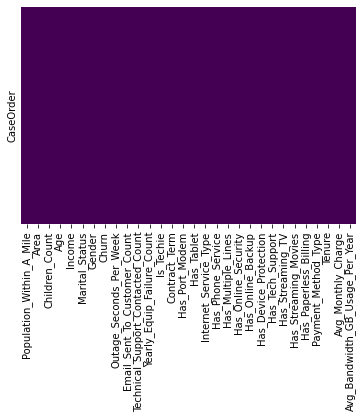

In [10]:
# create heat map to visualize missing data
# the yellow bars stands for null pboints
sns.heatmap(churn_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [11]:
# Impute missing fields with the median value
churn_data=churn_data.fillna(churn_data.median())
churn_data.isnull().values.any()

False

### C2  Identify the initial data set variables that you will use to perform the analysis for the classification question from part A1, and classify each variable as continuous or categorical.
*The submission identifies the data set variables used to perform the analysis for the classification question from part A1, and the submission accurately classifies each variable as continuous or categorical.*
#### Variables Selected for Analysis (based on previous analysis in D208 Task 2)
**Continuous Variables**
Age, Email_Sent_To_Customer_Count, Avg_Bandwidth_GB_Usage_Per_Year
<br>
**Categorical Variables**
Is_Techie, Has_Multiple_Lines, Has_Online_Backup, Has_Device_Protection, Has_Streaming_TV 

In [12]:
# See how many features we have - the lower the better so need to drop some features
print(len(churn_data.columns))

30


In [13]:
# Keep only the variables of importance determined in D208 Task 2
churn_data = churn_data[['Age', 'Email_Sent_To_Customer_Count', 'Is_Techie', 'Has_Multiple_Lines', 'Has_Online_Backup', 'Has_Device_Protection', 'Has_Streaming_TV', 'Avg_Bandwidth_GB_Usage_Per_Year', 'Churn']]

In [14]:
# Dummy encoding for categorical data - needed to scale the features
mapping = {"Yes": 1, "No": 0}
churn_data.replace(mapping, inplace=True)
churn_data = pd.get_dummies(data=churn_data)
churn_data.head()

,Age,Email_Sent_To_Customer_Count,Is_Techie,Has_Multiple_Lines,Has_Online_Backup,Has_Device_Protection,Has_Streaming_TV,Avg_Bandwidth_GB_Usage_Per_Year,Churn
CaseOrder,,,,,,,,,
1,68,10,0,0,1,0,0,904.536110,0
2,27,12,1,1,0,0,1,800.982766,1
3,50,9,1,1,0,0,0,2054.706961,0
4,48,15,1,0,0,0,1,2164.579412,0
5,83,16,0,0,0,0,1,271.493436,1


In [15]:
# Checking for outliers in the continuous variables
# https://www.kaggle.com/code/gauravduttakiit/telecom-churn-case-study-with-knn/notebook
continuous_variables = churn_data[['Age','Email_Sent_To_Customer_Count','Avg_Bandwidth_GB_Usage_Per_Year']]

In [16]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
continuous_variables.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Age,Email_Sent_To_Customer_Count,Avg_Bandwidth_GB_Usage_Per_Year
count,10000.000000,10000.000000,10000.000000
mean,53.078400,12.016000,3392.341550
std,20.698882,3.025898,2185.294852
min,18.000000,1.000000,155.506715
25%,35.000000,10.000000,1236.470827
50%,53.000000,12.000000,3279.536903
75%,71.000000,14.000000,5586.141369
90%,82.000000,16.000000,6129.380893
95%,86.000000,17.000000,6370.936192
99%,89.000000,19.000000,6727.307238


In [17]:
# Standardize features by removing the mean and scaling to unit variance.
# Resource: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
scaler = MinMaxScaler()

In [18]:
scaler.fit(churn_data.drop('Churn', axis=1))

MinMaxScaler()

In [19]:
scaled_features = scaler.transform(churn_data.drop('Churn',axis=1))

In [20]:
churn_data_features = pd.DataFrame(scaled_features,columns=churn_data.columns[:-1])

In [21]:
churn_data.head()

,Age,Email_Sent_To_Customer_Count,Is_Techie,Has_Multiple_Lines,Has_Online_Backup,Has_Device_Protection,Has_Streaming_TV,Avg_Bandwidth_GB_Usage_Per_Year,Churn
CaseOrder,,,,,,,,,
1,68,10,0,0,1,0,0,904.536110,0
2,27,12,1,1,0,0,1,800.982766,1
3,50,9,1,1,0,0,0,2054.706961,0
4,48,15,1,0,0,0,1,2164.579412,0
5,83,16,0,0,0,0,1,271.493436,1


In [22]:
churn_data.replace(np.nan, 0, inplace=True) # replace NaN values - knn cannot run with these
np.any(np.isnan(churn_data))

False

In [23]:
churn_data.head()

,Age,Email_Sent_To_Customer_Count,Is_Techie,Has_Multiple_Lines,Has_Online_Backup,Has_Device_Protection,Has_Streaming_TV,Avg_Bandwidth_GB_Usage_Per_Year,Churn
CaseOrder,,,,,,,,,
1,68,10,0,0,1,0,0,904.536110,0
2,27,12,1,1,0,0,1,800.982766,1
3,50,9,1,1,0,0,0,2054.706961,0
4,48,15,1,0,0,0,1,2164.579412,0
5,83,16,0,0,0,0,1,271.493436,1


### C4  Provide a copy of the cleaned data set.
*The submission includes an accurate copy of the cleaned data set.*

In [24]:
churn_data.to_csv('../churn_data/knn_cleaned_data.csv')

# Part IV: Analysis

## D.  Perform the data analysis and report on the results by doing the following:

### D1  Split the data into training and test data sets and provide the file(s).
*The submission provides reasonably proportioned training and test data sets.*

In [25]:
X = churn_data.drop('Churn',axis=1)
y = churn_data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### D2  Describe the analysis technique you used to appropriately analyze the data. Include screenshots of the intermediate calculations you performed.
*The submission accurately describes the analysis technique used to appropriately analyze the data, and the submission includes accurate screenshots of the intermediate calculations performed.*

The scikitlearn's method KNeighborsClassifier was used to build a knn model. The analysis technique used to analyze the model's performance was to start with k=1 neighbors and see what was initially returned. \ 

In the next steps error rate is compared to k=1 through 40 on a graph. On this graph it could be seen that the  error rate dropped to the minimum value where k=33. Next, the knn model was run for k=33 and used as the final model. \

It was concluded that k=33 neighbors was the ideal value to use for the best performance of our model.

### D3  Provide the code used to perform the classification analysis from part D2.
*The submission provides the code used to perform the classification analysis from part D2 and the code executes without errors.*

In [26]:
# n_neighbors is our k value - start with 1 and view results
knn = KNeighborsClassifier(n_neighbors=1)

In [27]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [28]:
prediction = knn.predict(X_test)

In [29]:
from sklearn.metrics import classification_report,confusion_matrix

In [30]:
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

[[1761  461]
 [ 438  340]]
              precision    recall  f1-score   support

           0       0.80      0.79      0.80      2222
           1       0.42      0.44      0.43       778

    accuracy                           0.70      3000
   macro avg       0.61      0.61      0.61      3000
weighted avg       0.70      0.70      0.70      3000



In [31]:
# Use elbow method to find best value for k
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test)) # average error rate for each k value - average of where my predictions were not equal to y_test values

Text(0, 0.5, 'Error Rate')

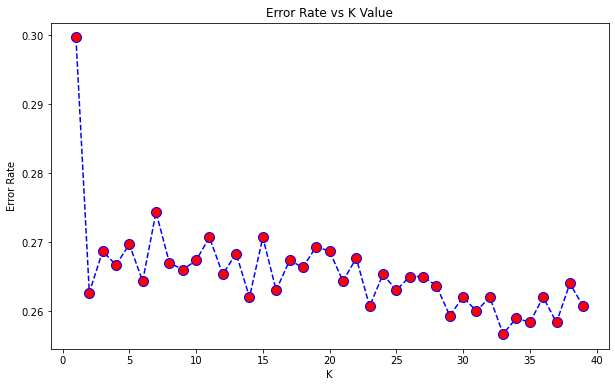

In [32]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Based on this graph 33 is going to get us the best results.

In [33]:
# Run for k = 33 and look at results
knn=KNeighborsClassifier(n_neighbors=33)
knn.fit(X_train,y_train)
prediction = knn.predict(X_test)
print(confusion_matrix(y_test,prediction))
print('\n')
print(classification_report(y_test,prediction))

[[1913  309]
 [ 461  317]]


              precision    recall  f1-score   support

           0       0.81      0.86      0.83      2222
           1       0.51      0.41      0.45       778

    accuracy                           0.74      3000
   macro avg       0.66      0.63      0.64      3000
weighted avg       0.73      0.74      0.73      3000



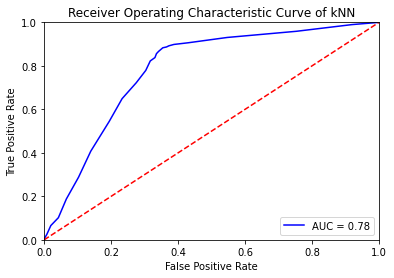

In [34]:
# Create ROC and AUC 
# Resource: https://stackoverflow.com/questions/52910061/implementing-roc-curves-for-k-nn-machine-learning-algorithm-using-python-and-sci
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

knn = KNeighborsClassifier(n_neighbors = 33)
knn.fit(X_train,y_train)

y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic Curve of kNN')
plt.show()

# Part V: Data Summary and Implications

## E.  Summarize your data analysis by doing the following:

### E1  Explain the accuracy and the area under the curve (AUC) of your classification model.
*The submission logically explains both the accuracy and the AUC of the classification model.*
Resource: https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/#:~:text=The%20Area%20Under%20the%20Curve,the%20positive%20and%20negative%20classes. \

The AUC for the model when k=33 is 0.78. This is a pretty good score and shows that the kNN classifier model will have a high chance of distinguishing between positive and negative class values. According to anniruddha (analyticsvidhya, 2020) "when 0.5<AUC<1, there is a high chance that the classifier will be able to distinguish the positive class values from the negative class values".

According to the classification report our model has a 74% accuracy.

### E2  Discuss the results and implications of your classification analysis.
*The submission adequately discusses both the results and implications of the classification analysis.*

|Metric Name | Metric Value | Notes |
|---------------:|:---:|:---|
|**precicion 0** | 0.81 | Precision is TP/TP+FP |
|**precision 1** | 0.51 | Precision for likelihood to churn is ~50/50 chance of returning correct results. |
|**precision macro avg** |0.66 |  |
|**precision weighted avg**|  0.73 |  |
|**recall 0** |  0.86 | Recall is TP/TP+FN |
|**recall 1** | 0.41 | |  |
|**recall macro avg** | 0.63 |  |
|**recall weighted avg**| 0.74|  |
|**f1-score 0** | 0.83 | | The F1 score is the harmonic mean of precision and recall. |
|**f1-score 1** | 0.45   | The model performs pretty poorly for those classified as churned. |
|**f1-score accuracy**| 0.74 |  |
|**f1-score macro avg** | 0.64|  |
|**f1-score weighted avg**| 0.73  |  |
|**support 0** | 2222 | |
|**support 1** | 778 | |
|**support accuracy** | 3000 | |
|**support macro avg** |3000  | |
|**support weighted avg**| 3000 | |

### E3  Discuss one limitation of your data analysis.
*The submission logically discusses 1 limitation of the data analysis with adequate detail.* \
**The limitation of this data set is that it is kind of small. With access to more customers or a longer time frame the results of the classifier would improve in accuracy.**

### E4  Recommend a course of action for the real-world organizational situation from part A1 based on your results and implications discussed in part E2.
*The submission recommends a reasonable course of action for the real-world organizational situation from part A1 based on the results and implications discussed in part E2.*

# Part VI: Demonstration

## F.  Provide a Panopto video recording that includes a demonstration of the functionality of the code used for the analysis and a summary of the programming environment.

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=f7fbe153-84d8-4fa7-9cde-ae88013076b9

Note: The audiovisual recording should feature you visibly presenting the material (i.e., not in voiceover or embedded video) and should simultaneously capture both you and your multimedia presentation.
 

Note: For instructions on how to access and use Panopto, use the "Panopto How-To Videos" web link provided below. To access Panopto's website, navigate to the web link titled "Panopto Access," and then choose to log in using the “WGU” option. If prompted, log in using your WGU student portal credentials, and then it will forward you to Panopto’s website.
 

To submit your recording, upload it to the Panopto drop box titled “Data Mining I – NVM2.” Once the recording has been uploaded and processed in Panopto's system, retrieve the URL of the recording from Panopto and copy and paste it into the Links option. Upload the remaining task requirements using the Attachments option.
 

## G.  Record the web sources used to acquire data or segments of third-party code to support the analysis. Ensure the web sources are reliable.



## H.  Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized.

1. https://medium.com/swlh/its-all-about-assumptions-pros-cons-497783cfed2d 
2. https://wgu.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp
3. https://stackoverflow.com/questions/52910061/implementing-roc-curves-for-k-nn-machine-learning-algorithm-using-python-and-sci
4. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
5. https://www.kaggle.com/code/gauravduttakiit/telecom-churn-case-study-with-knn/notebook

## I.  Demonstrate professional communication in the content and presentation of your submission.

File Restrictions
File name may contain only letters, numbers, spaces, and these symbols: ! - _ . * ' ( )
File size limit: 200 MB
File types allowed: doc, docx, rtf, xls, xlsx, ppt, pptx, odt, pdf, txt, qt, mov, mpg, avi, mp3, wav, mp4, wma, flv, asf, mpeg, wmv, m4v, svg, tif, tiff, jpeg, jpg, gif, png, zip, rar, tar, 7z